# **1. Interesting Topic Selection with 9+ categories**

**Topic: Traditional Clothing Recognition**

1. KIMONO (JAPAN)
2. HANBOK (SOUTH KOREA)
3. CHEONGSAM/QIPAO (CHINA)
4. SARI (INDIA)
5. THAWB/DISHDASHA (SAUDI ARABIA)
6. DIRNDL (GERMANY)
7. KILT (SCOTLAND)
8. AO DAI (VIETNAM)
9. BOUBOU (WEST AFRICA)
10. HUIPIL (MEXICO)
11. SARONG (INDONESIA)
12. CHADOR (IRAN)
13. TRAJE DE FLAMENCA (SPAIN)
14. BATIK (MALAYSIA)
15. THOBE (PALESTINE)
16. NATIONAL DRESS (NORWAY)
17. NATIONAL COSTUME (PHILIPPINES)
18. BARONG TAGALOG (PHILIPPINES)
19. ABAYA (UNITED ARAB EMIRATES)
20. FOLKDRÄKT (SWEDEN)
21. AO PO'I (PARAGUAY)
22. POUNAMU PIUPIU (NEW ZEALAND)
23. KAFTAN (MOROCCO)





Setting Up Neccessary things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # Batch Size
version = 0

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.4/492.4 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade fastai

In [ ]:
!pip install fastbook

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Master_Course_Data Science/LastAssignment

/content/drive/MyDrive/Master_Course_Data Science/LastAssignment


# **2. Data Collection, Model Training, Data Cleaning**

### **Fetch Data**

In [ ]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,                                # get_image_file returns a list of all images in that path recursively by default
    splitter = RandomSplitter(valid_pct= 0.1, seed = 42),       # getting 80-20 train-validation split
    get_y = parent_label,                                       # taking the folder name as labels
    item_tfms= Resize(128)                                      # resizing to get the image of same shape
)

In [ ]:
data_path = "data"

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale= 0.5), batch_tfms= aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"data_loader/cloth_dataloader_v{version}.pkl")

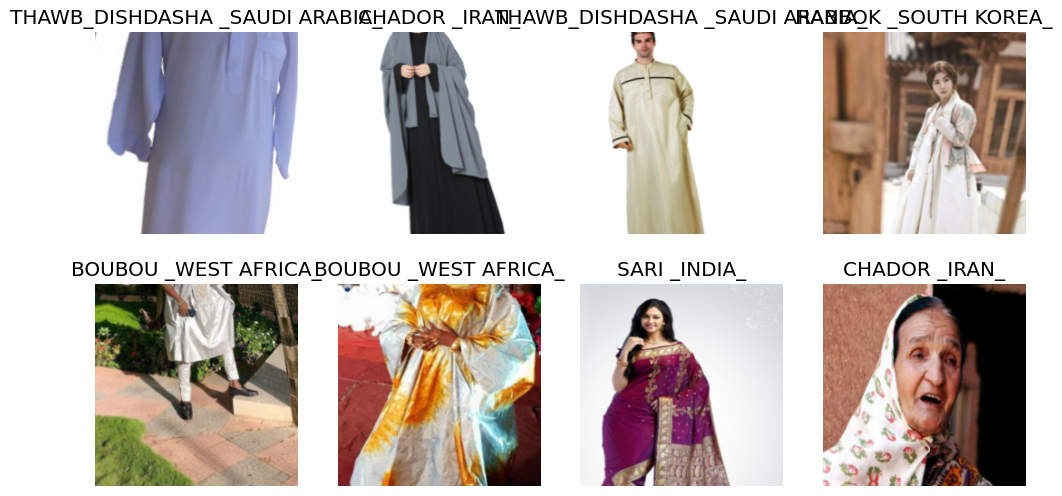

In [ ]:
dls.train.show_batch(max_n = 8, nrows = 2)

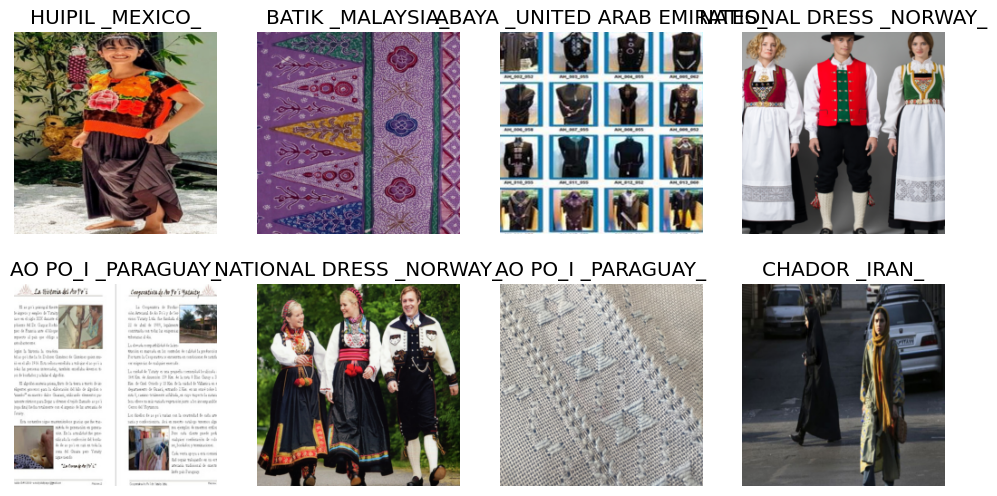

In [ ]:
from PIL import UnidentifiedImageError

try:
    dls.valid.show_batch(max_n = 8, nrows = 2)
except UnidentifiedImageError as e:
    print(f"Error occurred while displaying batch: {str(e)}")

## **Model Training** - resnet34

In [ ]:
model_path = "model"

**resnet24**

In [ ]:
model = vision_learner(dls,  resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 73.6MB/s]


In [ ]:
model.fine_tune(6)

In [ ]:
model.save(f"tradiotional_clothing_recognition-v{version}")

Path('models/tradiotional_clothing_recognition-v0.pth')

In [ ]:
model.load(f"tradiotional_clothing_recognition-v{version}")

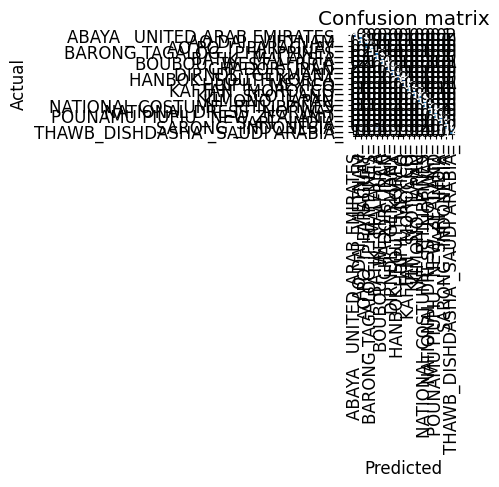

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

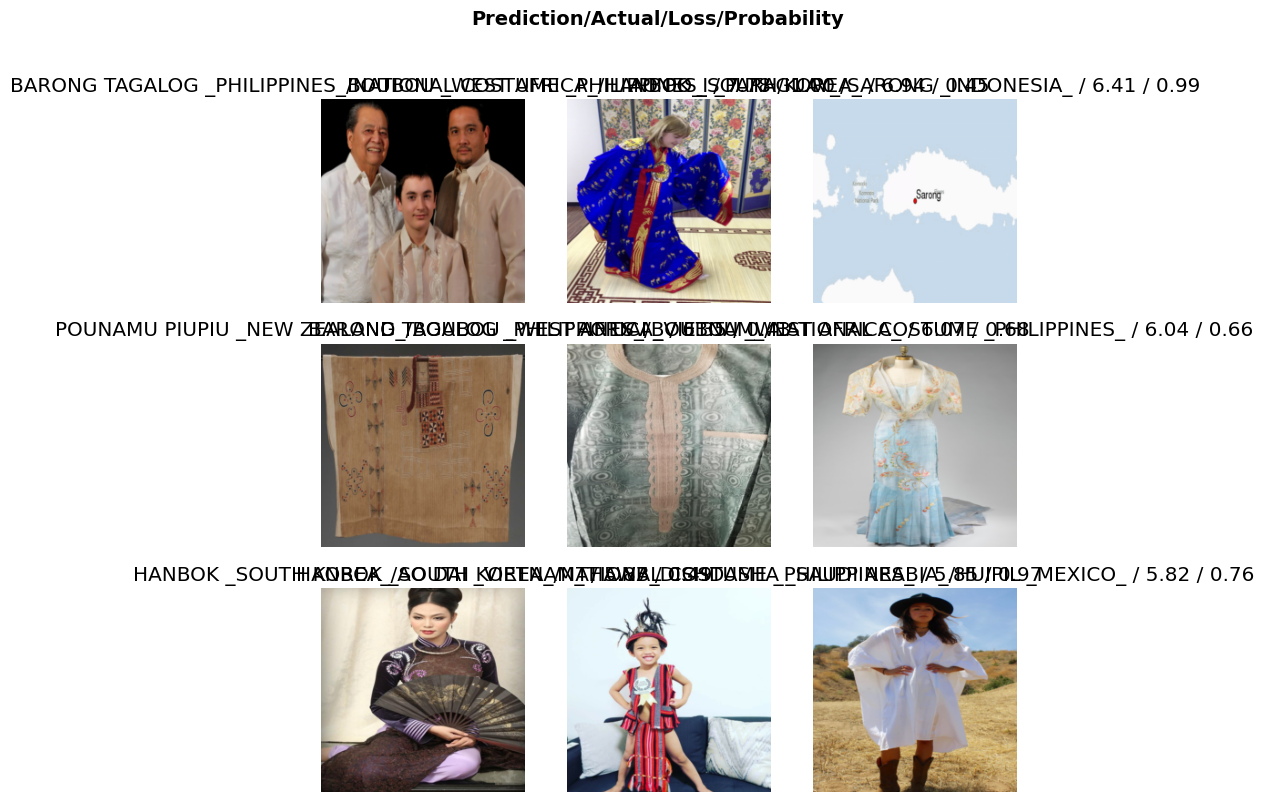

In [ ]:
interp.plot_top_losses(9, nrows = 3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()  # Delete Irrelevant

for idx, cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")  # Change the directory


### **Export Model For Inference**

In [ ]:
model_path = "models"
model.export(f"{model_path}/tradiotional_clothing_recognition-v{version}.pkl")

In [ ]:
# model_path = "model"
# model.export("/content/drive/MyDrive/Master_Course_Data Science/LastAssignment/models/tradiotional_clothing_recognition-v0.pth")

## **Model Training** - resnet152

In [ ]:
model_path = "model"

**resnet24**

In [ ]:
# Load the pretrained ResNet-120 model
resnet152 = vision_learner(dls, resnet152, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:04<00:00, 59.9MB/s]


In [ ]:
resnet152.fine_tune(6)

In [ ]:
resnet152.save("tradiotional_clothing_recognition-v1")

Path('models/tradiotional_clothing_recognition-v1.pth')

In [ ]:
resnet152.load("tradiotional_clothing_recognition-v1")

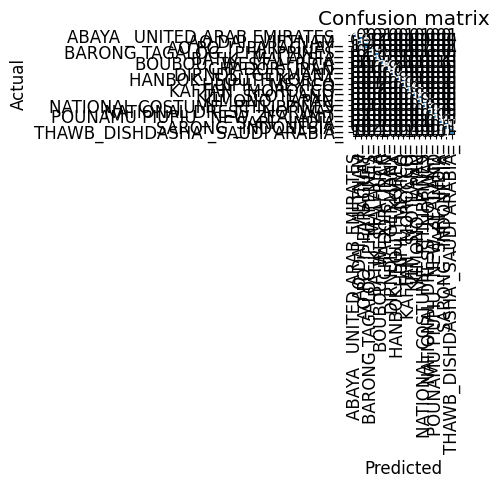

In [ ]:
interp = ClassificationInterpretation.from_learner(resnet152)
interp.plot_confusion_matrix()

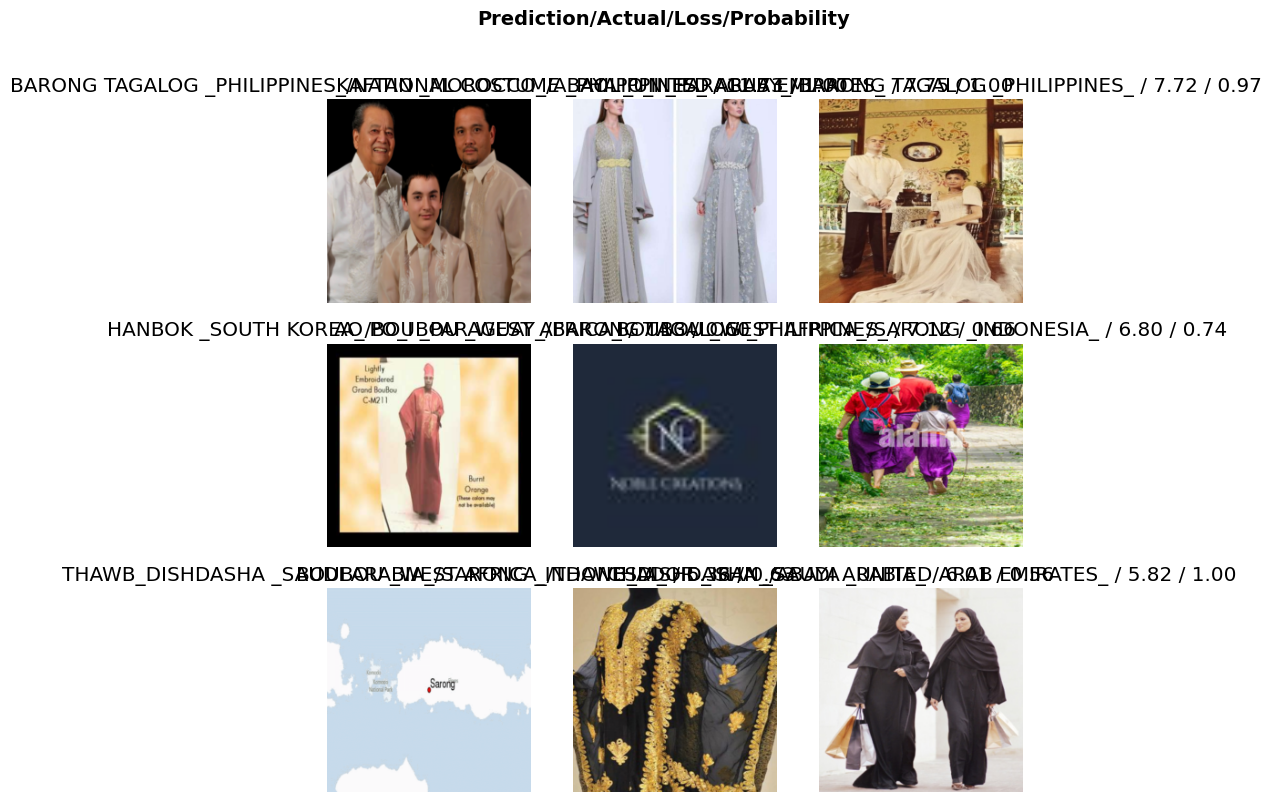

In [ ]:
interp.plot_top_losses(9, nrows = 3)

In [ ]:
cleaner = ImageClassifierCleaner(resnet152)
cleaner

In [ ]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()  # Delete Irrelevant

for idx, cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")  # Change the directory


### **Export Model For Inference**

In [ ]:
model_path = "models"
version  = 1
resnet152.export(f"{model_path}/tradiotional_clothing_recognition-v{version}.pkl")

In [ ]:
# model_path = "model"
# model.export("/content/drive/MyDrive/Master_Course_Data Science/LastAssignment/models/tradiotional_clothing_recognition-v0.pth")

## **Model Training** - DenseNet121

In [ ]:
model_path = "model"

**resnet24**

In [ ]:
# Load the pretrained ResNet-120 model
DenseNet121 = vision_learner(dls, densenet121, pretrained=True, metrics=[error_rate, accuracy])


In [ ]:
DenseNet121.fine_tune(6)

In [ ]:
DenseNet121.save("tradiotional_clothing_recognition-v2")

Path('models/tradiotional_clothing_recognition-v2.pth')

In [ ]:
DenseNet121.load("tradiotional_clothing_recognition-v2")

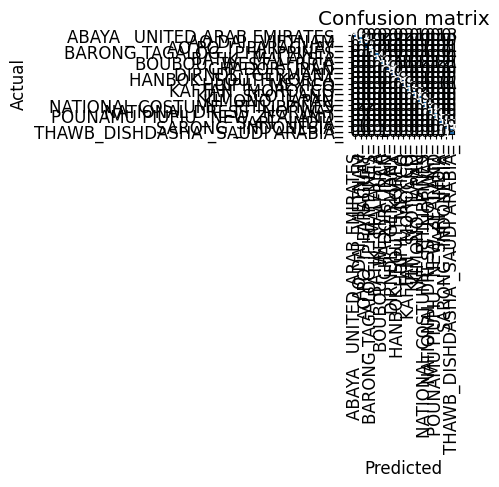

In [ ]:
interp = ClassificationInterpretation.from_learner(DenseNet121)
interp.plot_confusion_matrix()

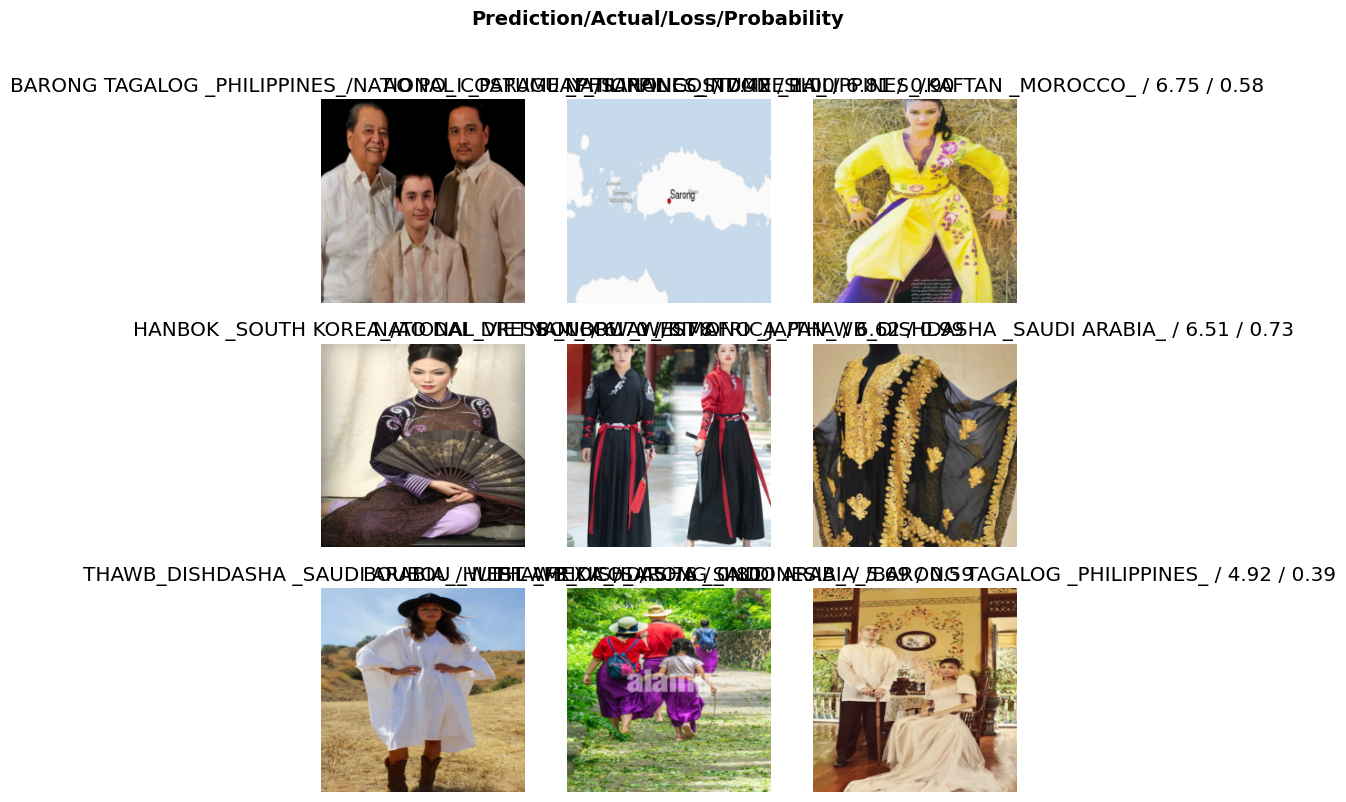

In [ ]:
interp.plot_top_losses(9, nrows = 3)

In [ ]:
cleaner = ImageClassifierCleaner(DenseNet121)
cleaner

In [ ]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()  # Delete Irrelevant

for idx, cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")  # Change the directory


### **Export Model For Inference**

In [ ]:
model_path = "models"
version  = 2
DenseNet121.export(f"{model_path}/tradiotional_clothing_recognition-v{version}.pkl")

In [ ]:
# model_path = "model"
# model.export("/content/drive/MyDrive/Master_Course_Data Science/LastAssignment/models/tradiotional_clothing_recognition-v0.pth")